In [3]:


import numpy as np 
import pandas as pd 



C:\Users\ASUS\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ASUS\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\ASUS\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [4]:
df=pd.read_csv('data.csv',encoding='cp1252')
df.head()

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [5]:
df.shape

(435742, 13)

# We are droping the following columns
* **stn_code:** Just a code and it will not gonna help fot the analysis
* **sampling_data:** We have another datcolumn with clear format
* **spm:** Missing values are more than 50%
* **pm2_5:** Missing values are more than 50%

In [6]:
df.drop(['stn_code','sampling_date', 'spm', 'pm2_5'], axis=1, inplace=True)

In [7]:
#show the information about dataset
df_dtype=df.dtypes
df_missing=df.isna().mean().round(5)*100
df_desc = df.describe(include='all')
dtls_1=pd.DataFrame(df_missing, columns=['missing'])
dtls_2=pd.DataFrame(df_dtype, columns=['dtype'])
dtls_3=pd.DataFrame(df_desc)
dtls_3=dtls_3.T
dtls=pd.concat([dtls_1, dtls_2, dtls_3], axis=1)
dtls.sort_values(by='missing', ascending=False)

,missing,dtype,count,unique,top,freq,mean,std,min,25%,50%,75%,max
agency,34.305,object,286261,64,Maharashtra State Pollution Control Board,27857,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rspm,9.231,float64,395520.0,NaN,NaN,NaN,108.832784,74.872430,0.0,56.0,90.0,142.0,6307.033333
so2,7.951,float64,401096.0,NaN,NaN,NaN,10.829414,11.177187,0.0,5.0,8.0,13.7,909.000000
location_monitoring_station,6.309,object,408251,991,Regional Office,6261,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no2,3.725,float64,419509.0,NaN,NaN,NaN,25.809623,18.503086,0.0,14.0,22.0,32.2,876.000000
type,1.238,object,430349,10,"Residential, Rural and other Areas",179014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,0.002,object,435735,5067,2015-03-19,253,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,0.001,object,435739,304,Guwahati,9984,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,0.000,object,435742,37,Maharashtra,60384,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
for i in list(df.select_dtypes(include='float64')):
    df[i].fillna(df[i].mean(), inplace=True)
    
df.isna().mean().round(5)*100

state                           0.000
location                        0.001
agency                         34.305
type                            1.238
so2                             0.000
no2                             0.000
rspm                            0.000
location_monitoring_station     6.309
date                            0.002
dtype: float64

In [9]:
#imputing null values in agencies with unknown is the correct way. If we are not sure about the name of the agencies, we should not impute with mode or other things

df['agency'].fillna('unknown', inplace=True)
df['location_monitoring_station'].fillna('unknown', inplace=True)

# though the null values are less in type feature we will use mode to impute those NAs
df['type'].fillna(df.type.mode()[0], inplace=True)
df['location'].fillna(df.location.mode()[0], inplace=True)
df['date'].fillna(df.date.mode()[0], inplace=True)

df.isna().sum().sum()



0

In [10]:
df.type.value_counts()

Residential, Rural and other Areas    184407
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64

In [11]:
df['type']=df['type'].replace(('Residential and others'),('Residential'))
df['type']=df['type'].replace(('Residential, Rural and other Areas'),('RIRUO'))
df['type']=df['type'].replace(('Industrial Area', 'Industrial Areas'),('Industrial', 'Industrial'))
df['type']=df['type'].replace(('Sensitive Area', 'Sensitive Areas'),('Sensitive', 'Sensitive'))

df.type.value_counts()

RIRUO          185711
Industrial     148071
Residential     86949
Sensitive       15011
Name: type, dtype: int64

In [12]:
df.location.value_counts()

Guwahati      9987
Hyderabad     9667
Delhi         8551
Chandigarh    8520
Jaipur        7850
              ... 
VAPI            24
SANAND          23
Khajuraho       16
Gangtok          1
Dharuhera        1
Name: location, Length: 304, dtype: int64

* Respirable suspended particulate matter (RSPM), the deadliest pollutant in the city air.
* Let's analyze which state is worst in case of RSPM

In [13]:
#top 10 worst states on the basis of rspm
df[['state', 'rspm']].groupby(['state']).agg('mean').sort_values('rspm',
                                                                 ascending=False).head(10).style.background_gradient(cmap='viridis')

,rspm
state,
Delhi,177.293687
Uttar Pradesh,170.096762
Jharkhand,167.607687
Punjab,163.842751
Uttarakhand,148.078126
Haryana,143.898317
Rajasthan,138.599740
Chhattisgarh,124.068943
Uttaranchal,120.791774


In [14]:
#top 10 worst cities on the basis of rspm

df[['location', 'rspm']].groupby(['location']).agg('mean').sort_values('rspm',
                                                                 ascending=False).head(10).style.background_gradient(cmap='viridis')

,rspm
location,
West Singhbhum,246.417219
Ghaziabad,241.417037
Allahabad,230.739709
Bareilly,229.932926
Ludhiana,211.272161
Khanna,208.148399
Mathura,206.256410
Gwalior,196.250704
Gobindgarh,190.759523


In [15]:
#Let's analyze which type of areas are mostly polluted

df[['type', 'rspm']].groupby(['type']).agg('mean').sort_values('rspm', ascending=False).style.background_gradient(cmap='inferno')

,rspm
type,
Industrial,120.624388
Residential,102.992314
RIRUO,102.875210
Sensitive,100.053598


# Let's analyze in Tamil Nadu

In [16]:
df[df['state']=='Tamil Nadu']['location'].unique()

array(['Madras', 'Turicorin', 'Tuticorin', 'Coimbatore', 'Madurai',
       'Salem', 'Chennai', 'Thoothukudi', 'Trichy', 'Mettur', 'Cuddalore'],
      dtype=object)

In [17]:
df['location']=df['location'].replace(('Madras', 'Turicorin', 'Thoothukudi', 'Mettur'),('Chennai', 'Tuticorin', 'Tuticorin', 'Salem'))

In [18]:
df[df['state']=='Tamil Nadu'][['location', 'rspm']].groupby(['location']).agg('mean').sort_values('rspm',
                                                                                                  ascending=False).style.background_gradient(cmap='cool')

,rspm
location,
Tuticorin,99.787373
Trichy,85.000984
Coimbatore,69.416035
Chennai,68.626685
Salem,61.509919
Cuddalore,57.531490
Madurai,48.534915


In [19]:
#let's check which type of area causing more pollution in tuticorin
df[df['location']=='Tuticorin'][['type', 'rspm']].groupby(['type']).agg('mean').sort_values('rspm',
                                                                                           ascending=False).style.background_gradient(cmap='inferno')

,rspm
type,
Industrial,127.184813
RIRUO,92.984261
Residential,76.384041


In [20]:
#As we know Industrial areas causing more pollution let's check which industrial areas causing more pollution in tamilnadu
df[(df['type']=='industrial')|(df['state']=='Tamil Nadu')][['location', 
                                                            'rspm']].groupby(['location']).agg('mean').sort_values('rspm', 
                                                                                                                   ascending=False).style.background_gradient(cmap='rainbow')

,rspm
location,
Tuticorin,99.787373
Trichy,85.000984
Coimbatore,69.416035
Chennai,68.626685
Salem,61.509919
Cuddalore,57.531490
Madurai,48.534915


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

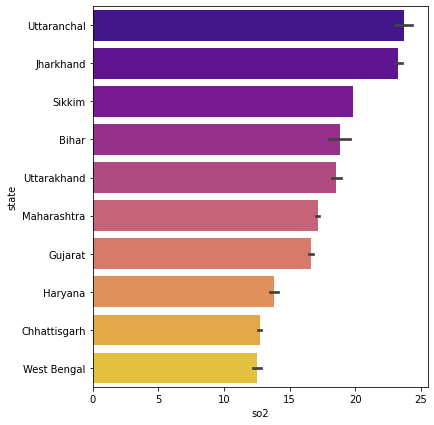

In [22]:
sorted=df.groupby(['state'])['so2'].agg('mean').reset_index().sort_values('so2', ascending=False).head(10)
plt.rcParams['figure.figsize']=6,7
sns.barplot(y=df['state'], x=df['so2'], palette='plasma', order=sorted['state'])
plt.show()

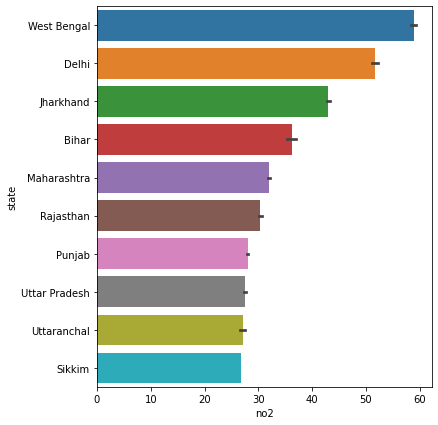

In [23]:
sorted=df.groupby(['state'])['no2'].agg('mean').reset_index().sort_values('no2', ascending=False).head(10)
plt.rcParams['figure.figsize']=6,7
sns.barplot(y=df['state'], x=df['no2'], order=sorted['state'])
plt.show()

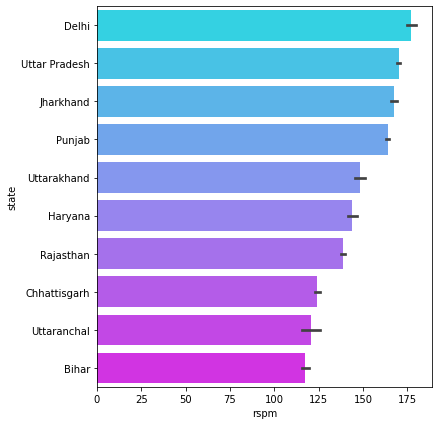

In [24]:
sorted=df.groupby(['state'])['rspm'].agg('mean').reset_index().sort_values('rspm', ascending=False).head(10)
plt.rcParams['figure.figsize']=6,7
sns.barplot(y=df['state'], x=df['rspm'], order=sorted['state'], palette='cool')
plt.show()

In [25]:
df=pd.read_csv("final.csv")
df.drop(["location","type"],inplace=True ,axis=1)
df.drop(0,inplace=True)
df.drop_duplicates("state",keep="first",inplace=True)

In [26]:
df.head()

,state,so2,no2
1,andhra pradesh,4.65,11.19
33,arunachal pradesh,3.38,6.16
35,assam,5.97,13.12
51,bihar,35.28,41.31
57,chandigarh,3.57,25.88


In [27]:
df_sort_so2 = df.sort_values("so2")

In [28]:
import plotly.express as px
fig=px.bar(data_frame=df_sort_so2,x="state",y="so2",color="so2",hover_data=['state','so2'],width=1000, height=800)
fig.show()

In [29]:
df_sort_no2 = df.sort_values("no2")

In [30]:
import plotly.express as px
fig=px.bar(data_frame=df_sort_so2,x="state",y="no2",color="no2",hover_data=['state','no2'],width=1000, height=800)
fig.show()